In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def canny_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    blur = cv2.GaussianBlur(gray, (5, 5), 0)  # Apply Gaussian Blur
    edges = cv2.Canny(blur, 50, 150)  # Apply Canny Edge Detection
    return edges

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def hough_transform(image):
    lines = cv2.HoughLinesP(image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    return lines

def draw_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image


In [4]:
def detect_lane(image):
    lane_image = np.copy(image)
    edges = canny_edge_detection(lane_image)
    roi = region_of_interest(edges)
    lines = hough_transform(roi)
    line_image = draw_lines(lane_image, lines)
    combined = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
    return combined


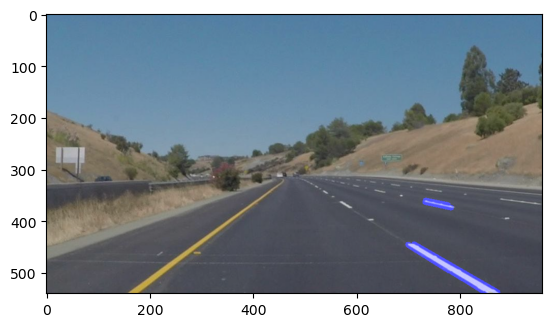

In [5]:
image = cv2.imread("test.jpg")
lane_detected = detect_lane(image)

plt.imshow(cv2.cvtColor(lane_detected, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
cap = cv2.VideoCapture("test_video.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    lane_frame = detect_lane(frame)
    cv2.imshow("Lane Detection", lane_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 